<a href="https://colab.research.google.com/github/maryam-sabet/KFold_DeepLearning_BinaryClassification_using_EnsembleMethod/blob/main/Ensemble__learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Change tensorflow version**

In [ ]:
# !pip install tensorflow==2.9.1

# **Libraries**

In [ ]:
import glob
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import random
import numpy as np
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,DenseNet169,DenseNet121,NASNetMobile,EfficientNetB0,EfficientNetV2B0,ResNet50V2
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input,Flatten,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint , CSVLogger , LearningRateScheduler
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix , ConfusionMatrixDisplay ,classification_report
from sklearn.metrics import accuracy_score

In [ ]:
tf.__version__

'2.12.0'

# **Loading data**

In [ ]:
data = np.load("/content/drive/MyDrive/paper/data.npy",allow_pickle=True)
label = np.load("/content/drive/MyDrive/paper/label.npy",allow_pickle=True)


In [ ]:
random.seed(1254)
combined = list(zip(data, label))
random.shuffle(combined)


data, label = zip(*combined)
label = np.array(label)
data = np.array(data)

<ipython-input-4-66914fa876a0>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [ ]:
# Label binarizing
lb = preprocessing.LabelBinarizer()

labels = lb.fit_transform(label)
label_category = to_categorical(labels , num_classes=2)

In [ ]:
#resize input images
Data =list()
for item in data:
  img = cv2.resize(item , (224,224) , cv2.INTER_NEAREST )
  Data.append(img)

Data = np.array(Data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data, label_category, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape ,y_train.shape ,X_test.shape , y_test.shape  )

(1120, 224, 224, 3) (1120, 2) (280, 224, 224, 3) (280, 2)


# **Models**

# **preprocessing for fit model and fit**

In [ ]:
x_train=X_train/255.0
x_test=X_test/255.0

In [ ]:
# **Models and Ensembling**

# Load pre-trained models

model_xception = tf.keras.models.load_model("/content/drive/MyDrive/paper/ensemble-learning/Xception.h5")
model_mobilenet = tf.keras.models.load_model("/content/drive/MyDrive/paper/ensemble-learning/MobileNet.h5")
model_densenet = tf.keras.models.load_model("/content/drive/MyDrive/paper/ensemble-learning/DenseNet121.h5")
model_EfficientNetV2B0 = tf.keras.models.load_model("/content/drive/MyDrive/paper/ensemble-learning/EfficientNetV2B0.h5")
model_MobileNetV2 = tf.keras.models.load_model("/content/drive/MyDrive/paper/ensemble-learning/MobileNetV2.h5")

In [ ]:
# Make predictions using each model
prediction_xception = model_xception.predict(x_test)
prediction__mobilenet = model_mobilenet.predict(x_test)
prediction__densenet = model_densenet.predict(x_test)
prediction__EfficientNetV2B0 = model_EfficientNetV2B0.predict(x_test)
prediction__MobileNetV2 = model_MobileNetV2.predict(x_test)



9/9 [==============================] - 3s 106ms/step


In [ ]:
# Convert predictions to labels
prediction_xception=np.argmax(prediction_xception,-1)
prediction__mobilenet=np.argmax(prediction__mobilenet,-1)
prediction__densenet=np.argmax(prediction__densenet,-1)
prediction__EfficientNetV2B0 = np.argmax(prediction__EfficientNetV2B0,-1)
prediction__MobileNetV2 = np.argmax(prediction__MobileNetV2,-1)

y_test=np.argmax(y_test,-1)

In [ ]:
# Ensembling the predictions

prediction = []

for pred in range(len(prediction_xception)):   # pred==1
    class_0=[]
    class_1=[]

    A = prediction_xception[pred]
    B = prediction__mobilenet[pred]
    c = prediction__densenet[pred]
    D = prediction__EfficientNetV2B0[pred]
    E = prediction__MobileNetV2[pred]

    if A==0:
      class_0.append(0)
    if B==0:
       class_0.append(0)
    if c==0:
       class_0.append(0)
    if D==0:
       class_0.append(0)
    if E==0:
       class_0.append(0)

    if A==1:
      class_1.append(1)
    if B==1:
       class_1.append(1)
    if c==1:
       class_1.append(1)
    if D==1:
       class_1.append(1)
    if E==1:
       class_1.append(1)

    if len(class_0)>len(class_1):
      prediction.append(0)
    else:
        prediction.append(1)


In [ ]:
# Calculate and display accuracy and other metrics
accuracy=accuracy_score(y_test, prediction)
print(accuracy*100)

100.0


In [ ]:
precision = precision_score(y_test , prediction ,  average="weighted")
print(precision*100)

100.0


In [ ]:
recal = recall_score(y_test , prediction ,  average="weighted")
print(recal*100)

100.0


In [ ]:
f1 = f1_score(y_test , prediction ,  average="weighted")
print(f1*100)

100.0


In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       143

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [ ]:
confusion_matrix(y_test , prediction)

array([[137,   0],
       [  0, 143]])

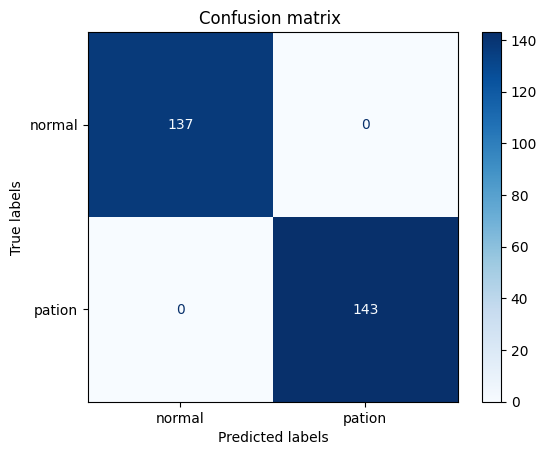

In [ ]:
cm=confusion_matrix(y_test , prediction)
target_names = ["normal" , "pation"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.title('Confusion matrix ')
plt.ylabel("True labels")
plt.show()